In [14]:
import pandas as pd
import numpy as np
import string
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from operator import index
import spacy
from spacy.language import Language
from spacy_langdetect import LanguageDetector
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r'../data/GTZAN/lyrics_dataframe.csv')
df

,filename,artist,title,genre,lyrics,instrumental
0,blues.00000.wav,John Lee Hooker,"One Bourbon, One Scotch And One Beer",blues,"One bourbon, one scotch and one beer\nOne bour...",False
1,blues.00001.wav,John Lee Hooker,I'm In The Mood For Love,blues,"I'm in the mood baby, I'm in the mood for love...",False
2,blues.00002.wav,John Lee Hooker,Think Twice Before You Go,blues,"\nThink twice before you go, baby, this will b...",False
3,blues.00003.wav,John Lee Hooker,I'm Bad Like Jesse James,blues,"\n...A little thing I'm going to do called ""I'...",False
4,blues.00004.wav,John Lee Hooker,Walkin’ The Boogie,blues,"Well my mama she didn't 'low me, just to stay ...",False
...,...,...,...,...,...,...
970,rock.00095.wav,The Stone Roses,Bye Bye Bad Man,rock,\nSoak me to my skin\nWill you drown me in you...,False
971,rock.00096.wav,The Stone Roses,(Song For My) Sugar Spun Sister,rock,"\nHer hair, soft drifted snow\nDeath white, I'...",False
972,rock.00097.wav,The Stone Roses,Made Of Stone,rock,\nYour knuckles whiten on the wheel\nThe last ...,False
973,rock.00098.wav,The Stone Roses,Shoot You Down,rock,You know it\nYou show it\nAnd the time has com...,False


In [3]:
print(set(df.genre))

{'pop', 'country', 'disco', 'blues', 'classical', 'reggae', 'metal', 'hiphop', 'jazz', 'rock'}


In [4]:
# value counts of all data samples that have lyrics
df[df.lyrics.notnull()].genre.value_counts()

pop          100
rock         100
disco         99
hiphop        98
country       96
metal         96
reggae        96
blues         78
jazz          18
classical      8
Name: genre, dtype: int64

## Filter datafame

- Remove instrumental songs (that do not have lyrics)
- Decided to remove e.g. the classical genre (only 8 non-instrumental songs)

In [5]:
df = df[df.lyrics.notnull()]
df = df[(df.genre != "classical") & (df.genre != "jazz")]
df

,filename,artist,title,genre,lyrics,instrumental
0,blues.00000.wav,John Lee Hooker,"One Bourbon, One Scotch And One Beer",blues,"One bourbon, one scotch and one beer\nOne bour...",False
1,blues.00001.wav,John Lee Hooker,I'm In The Mood For Love,blues,"I'm in the mood baby, I'm in the mood for love...",False
2,blues.00002.wav,John Lee Hooker,Think Twice Before You Go,blues,"\nThink twice before you go, baby, this will b...",False
3,blues.00003.wav,John Lee Hooker,I'm Bad Like Jesse James,blues,"\n...A little thing I'm going to do called ""I'...",False
4,blues.00004.wav,John Lee Hooker,Walkin’ The Boogie,blues,"Well my mama she didn't 'low me, just to stay ...",False
...,...,...,...,...,...,...
970,rock.00095.wav,The Stone Roses,Bye Bye Bad Man,rock,\nSoak me to my skin\nWill you drown me in you...,False
971,rock.00096.wav,The Stone Roses,(Song For My) Sugar Spun Sister,rock,"\nHer hair, soft drifted snow\nDeath white, I'...",False
972,rock.00097.wav,The Stone Roses,Made Of Stone,rock,\nYour knuckles whiten on the wheel\nThe last ...,False
973,rock.00098.wav,The Stone Roses,Shoot You Down,rock,You know it\nYou show it\nAnd the time has com...,False


In [6]:
df.genre.value_counts()

pop        100
rock       100
disco       99
hiphop      98
country     96
metal       96
reggae      96
blues       78
Name: genre, dtype: int64

### Check if any songs are not English

In [7]:
nlp = spacy.load('en_core_web_sm')

def get_lang_detector(nlp, name):
    return LanguageDetector()

Language.factory('language_detector', func=get_lang_detector)
nlp.add_pipe('language_detector', last=True)

In [8]:
indices = []
language = []
for i in range(len(df['lyrics'])):
    doc = nlp(df.iloc[i].lyrics)
    detected_language = doc._.language
    if not detected_language['language'] == 'en':
        indices.append(i)
        language.append(detected_language)
    if detected_language['language'] == 'en' and detected_language['score'] < 0.6:
        indices.append(i)
        language.append(detected_language)
        
print(indices)

[215, 223, 224, 243, 753]


In [9]:
# song "The lion sleeps tonight" was detected as Dutch -> delete
df = df.drop(df[df.title == "The Lion Sleeps Tonight"].index)

## Save final dataframe

In [15]:
df.to_csv('../data/GTZAN/filtered_df.csv', index=False)

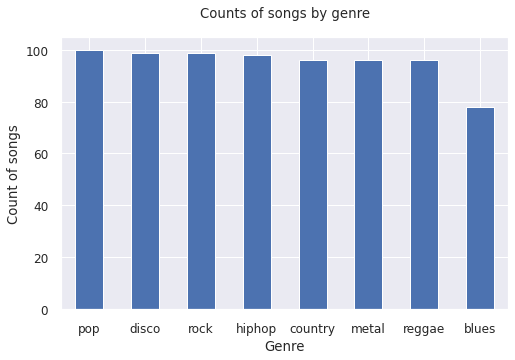

In [16]:
sns.set(font_scale=1.1)
df['genre'].value_counts().plot(kind='bar', rot=0, figsize=(8,5))
plt.xlabel("Genre")
plt.ylabel("Count of songs")
plt.title("Counts of songs by genre", y=1.05)
plt.show()

In [17]:
lyrics_lengths = df['lyrics'].str.split().str.len()

print("Minimum lyrics length: " + str(min(lyrics_lengths)) + " words")
print("Maximum lyrics length: " + str(max(lyrics_lengths)) + " words")
print("Average lyrics length: " + str(np.mean(lyrics_lengths)) + " words")
print("Median:                " + str(np.median(lyrics_lengths)) + " words")

Minimum lyrics length: 15 words
Maximum lyrics length: 1111 words
Average lyrics length: 289.2795275590551 words
Median:                243.0 words


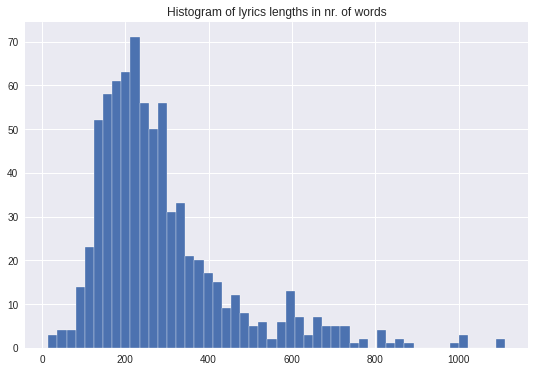

In [18]:
plt.figure(figsize=(9,6))
plt.style.use('seaborn')
plt.hist(lyrics_lengths, bins=50)
plt.title("Histogram of lyrics lengths in nr. of words")
plt.show()

## Cleanup and tokenize the data

In [19]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/lisa/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/lisa/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/lisa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [34]:
# tag map for POS tag (needed for lemmatization)
tag_map = defaultdict(lambda : wordnet.NOUN)
tag_map['J'] = wordnet.ADJ
tag_map['V'] = wordnet.VERB
tag_map['R'] = wordnet.ADV

def preprocess(text, lemmatize=False):
    
    # transform to lower-case and remove punctuation
    text_p = "".join([char for char in text.lower() if char not in string.punctuation])

    # split tokens
    words = word_tokenize(text_p)
    
    # remove common english stopwords
    stop_words = stopwords.words('english')
    filtered_words = [word for word in words if word not in stop_words]

    if lemmatize:
        # lemmatization (convert each token to its base form)
        lemmatizer = WordNetLemmatizer()
        lemmatized = []
        for token, tag in pos_tag(filtered_words):
            lemma = lemmatizer.lemmatize(token, tag_map[tag[0]])
            lemmatized.append(lemma)
        return lemmatized
    
    return filtered_words

In [42]:
print(preprocess("Testing the pre-processing function!"))
print(preprocess("Testing the pre-processing function!", lemmatize=True))

['testing', 'preprocessing', 'function']
['test', 'preprocessing', 'function']


In [45]:
tokenized = []
lemmatized = []
for post in df['lyrics']:
    tokenized.append(preprocess(post))
    lemmatized.append(preprocess(post, lemmatize=True))

In [51]:
print(df['lyrics'][0])
print(tokenized[0])

One bourbon, one scotch and one beer
One bourbon, one scotch and one beer

I said hey mister bartender, come here
I want another drink and I want it now
My girl, she gone, she been gone two night
I ain't seen the girl since night before last
Wanna get drunk, get her off my mind
One bourbon, one scotch, one beer
And then I sit there, drinkin, gettin' stoned, yeah yeah
After a while, I looked down the bar, at the bartender
I said Hey!  "Whadda ya want?"
One bourbon, one scotch, one beer
Well that girl, she gone, gone two night
I haven't seen the girl since night before last
I wanna get drunk, get her off of my mind
One bourbon, one scotch, one beer

And I sat there, gettin stoned, mellow
Feelin so good, so good
I looked down the bar, at the bartender
I said hey hey!  "Whadda ya want?"
One bourbon, one scotch, one beer

Well that girl, she gone, she gone two night
I haven't seen the girl since night before last
I wanna get drunk, get her off of my mind
One bourbon, one scotch, one beer

T

In [52]:
df['tokenized'] = tokenized
df['lemmatized'] = lemmatized
df

,filename,artist,title,genre,lyrics,instrumental,tokenized,lemmatized
0,blues.00000.wav,John Lee Hooker,"One Bourbon, One Scotch And One Beer",blues,"One bourbon, one scotch and one beer\nOne bour...",False,"[one, bourbon, one, scotch, one, beer, one, bo...","[one, bourbon, one, scotch, one, beer, one, bo..."
1,blues.00001.wav,John Lee Hooker,I'm In The Mood For Love,blues,"I'm in the mood baby, I'm in the mood for love...",False,"[im, mood, baby, im, mood, love, im, mood, bab...","[im, mood, baby, im, mood, love, im, mood, bab..."
2,blues.00002.wav,John Lee Hooker,Think Twice Before You Go,blues,"\nThink twice before you go, baby, this will b...",False,"[think, twice, go, baby, end, think, twice, go...","[think, twice, go, baby, end, think, twice, go..."
3,blues.00003.wav,John Lee Hooker,I'm Bad Like Jesse James,blues,"\n...A little thing I'm going to do called ""I'...",False,"[little, thing, im, going, called, im, bad, li...","[little, thing, im, go, call, im, bad, like, j..."
4,blues.00004.wav,John Lee Hooker,Walkin’ The Boogie,blues,"Well my mama she didn't 'low me, just to stay ...",False,"[well, mama, didnt, low, stay, night, long, oh...","[well, mama, didnt, low, stay, night, long, oh..."
...,...,...,...,...,...,...,...,...
970,rock.00095.wav,The Stone Roses,Bye Bye Bad Man,rock,\nSoak me to my skin\nWill you drown me in you...,False,"[soak, skin, drown, sea, submission, ends, beg...","[soak, skin, drown, sea, submission, end, begi..."
971,rock.00096.wav,The Stone Roses,(Song For My) Sugar Spun Sister,rock,"\nHer hair, soft drifted snow\nDeath white, I'...",False,"[hair, soft, drifted, snow, death, white, id, ...","[hair, soft, drift, snow, death, white, id, li..."
972,rock.00097.wav,The Stone Roses,Made Of Stone,rock,\nYour knuckles whiten on the wheel\nThe last ...,False,"[knuckles, whiten, wheel, last, thing, hands, ...","[knuckle, whiten, wheel, last, thing, hand, fe..."
973,rock.00098.wav,The Stone Roses,Shoot You Down,rock,You know it\nYou show it\nAnd the time has com...,False,"[know, show, time, come, shoot, sound, day, do...","[know, show, time, come, shoot, sound, day, do..."


In [53]:
df.to_csv('../data/GTZAN/tokenized_df.csv', index=False)

## Train test split

In [63]:
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['genre'], random_state=0)
df_train

,filename,artist,title,genre,lyrics,instrumental,tokenized,lemmatized
229,country.00041.wav,Johnny Cash,Goin' By The Book,country,\nYou can see it in the movies and the paper a...,False,"[see, movies, paper, tv, news, somebodys, army...","[see, movie, paper, tv, news, somebody, army, ..."
813,reggae.00038.wav,Burning Spear,Investigation Dub,reggae,I and I old I know\nI and I old I say\nI and I...,False,"[old, know, old, say, reconsider, see, upfully...","[old, know, old, say, reconsider, see, upfully..."
358,disco.00070.wav,KC and The Sunshine Band,That's The Way (I Like It),disco,"That's the way, aha, aha\nI like it, aha, aha\...",False,"[thats, way, aha, aha, like, aha, aha, thats, ...","[thats, way, aha, aha, like, aha, aha, thats, ..."
863,reggae.00088.wav,Marcia Griffiths,Electric Boogie,reggae,\nIt's electric!\n\n\nYou can't see it\nIt's e...,False,"[electric, cant, see, electric, got, ta, feel,...","[electric, cant, see, electric, get, ta, feel,..."
692,pop.00017.wav,Britney Spears,(I Can't Get No) Satisfaction,pop,\nI can't get no satisfaction\nI can't get no ...,False,"[cant, get, satisfaction, cant, get, satisfact...","[cant, get, satisfaction, cant, get, satisfact..."
...,...,...,...,...,...,...,...,...
268,country.00080.wav,Willie Nelson,Nothing I Can Do About It Now,country,\nI've got a long list of real good reasons\nF...,False,"[ive, got, long, list, real, good, reasons, th...","[ive, get, long, list, real, good, reason, thi..."
950,rock.00075.wav,Simply Red,She's Got It Bad,rock,\nI get off my things\nI lay down in the sidel...,False,"[get, things, lay, sidelines, dont, feel, hide...","[get, thing, lay, sideline, dont, feel, hide, ..."
318,disco.00030.wav,The Gibson Brothers,Latin America,disco,I dream of girls I used to know\nI see the fac...,False,"[dream, girls, used, know, see, faces, goodhea...","[dream, girl, use, know, see, face, goodhearte..."
390,hiphop.00002.wav,De La Soul,Buddy,hiphop,"\nHello\nMeany, meany, meany, meany \nMeany, m...",False,"[hello, meany, meany, meany, meany, meany, mea...","[hello, meany, meany, meany, meany, meany, mea..."


In [64]:
print(df_train.genre.value_counts())
print("")
print(df_test.genre.value_counts())

pop        80
disco      79
rock       79
hiphop     78
country    77
reggae     77
metal      77
blues      62
Name: genre, dtype: int64

disco      20
pop        20
rock       20
hiphop     20
metal      19
country    19
reggae     19
blues      16
Name: genre, dtype: int64


In [60]:
df_train.to_csv('../data/train_data.csv', index=False)
df_test.to_csv('../data/test_data.csv', index=False)